<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/Practice_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 2-1

Generate random data for a cubic function $x^3 – 5x^2 + x – 10$. Use gradient descent to find the fitted function.


Epoch [100/1000], Loss: 128.6453
Epoch [200/1000], Loss: 94.1924
Epoch [300/1000], Loss: 78.8275
Epoch [400/1000], Loss: 67.7548
Epoch [500/1000], Loss: 59.6928
Epoch [600/1000], Loss: 53.7758
Epoch [700/1000], Loss: 49.3883
Epoch [800/1000], Loss: 46.0922
Epoch [900/1000], Loss: 43.5756
Epoch [1000/1000], Loss: 41.6167


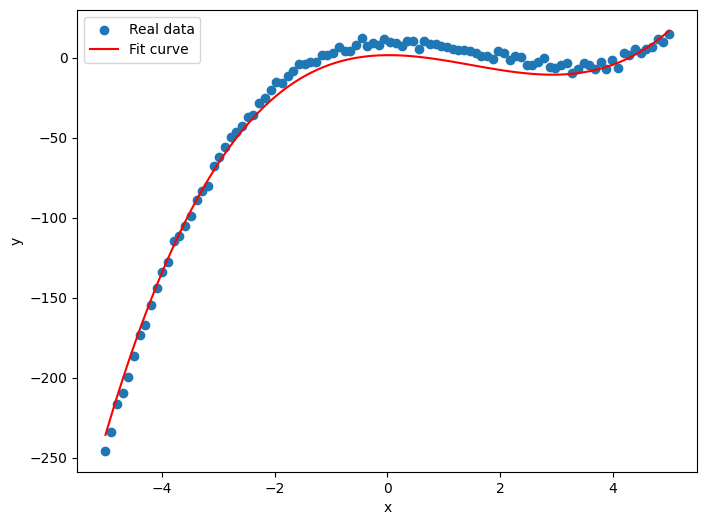

Fitted parameters：a=-4.44, b=0.26, c=1.57


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
torch.manual_seed(16) #for fixed random data
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

# Generate random data for a cubic function
def generate_cubic_data(num_samples):
    x = torch.linspace(-5, 5, num_samples)
    y =  x**3 - 5 * x**2 + x + 10  + torch.randn(num_samples) * 2
    return x, y

# Define a quadratic function model
def quadratic_model(x, params):
    a, b, c = params
    return  x**3 + a * x**2 + b * x + c

# Define the loss function (mean squared error)
def mean_squared_error(y_true, y_pred):
    return torch.mean((y_true - y_pred)**2)

def gradient_descent(x, y, learning_rate, num_epochs):
    # Initialize model parameters randomly
    params = torch.randn(3, requires_grad=True)

    for epoch in range(num_epochs):
        # Calculate the model predictions
        y_pred = quadratic_model(x, params)

        # Calculate the loss function
        loss = mean_squared_error(y, y_pred)


        # Calculate gradients and update parameters
        loss.backward()
        params.data -= learning_rate * params.grad.data
        # Clear the gradient
        params.grad.zero_()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return params


# Generate data
num_samples = 100
x, y = generate_cubic_data(num_samples)

learning_rate = 0.0001
num_epochs = 1000
optimal_params = gradient_descent(x, y, learning_rate, num_epochs)

# Plot the fitted curve
x_test = torch.linspace(-5, 5, 100)
y_pred = quadratic_model(x_test, optimal_params)

plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy(), label='Real data')
plt.plot(x_test.numpy(), y_pred.detach().numpy(), 'r-', label='Fit curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Output fitted parameters
print(f"Fitted parameters：a={optimal_params[0]:.2f}, b={optimal_params[1]:.2f}, c={optimal_params[2]:.2f}")

# 修改成四個參數

先修改 cubic function 將 $x^3$ 再多個係數，所以將原題目

$$x^3 – 5x^2 + x – 10$$ 改為

$$5x^3 – 5x^2 + x – 10$$

再來原程式 learning rate 是設為 $0.0001$，再求 gradient descent 時，參數會增加太多，最後無法收斂，導致 MQE 計算出來會是無限大，所以將 learning rate 調整成 $0.00001$

Epoch [100/1000], Loss: 306.7920
Epoch [200/1000], Loss: 201.4854
Epoch [300/1000], Loss: 141.3298
Epoch [400/1000], Loss: 105.6458
Epoch [500/1000], Loss: 84.4635
Epoch [600/1000], Loss: 71.8747
Epoch [700/1000], Loss: 64.3786
Epoch [800/1000], Loss: 59.9004
Epoch [900/1000], Loss: 57.2106
Epoch [1000/1000], Loss: 55.5807


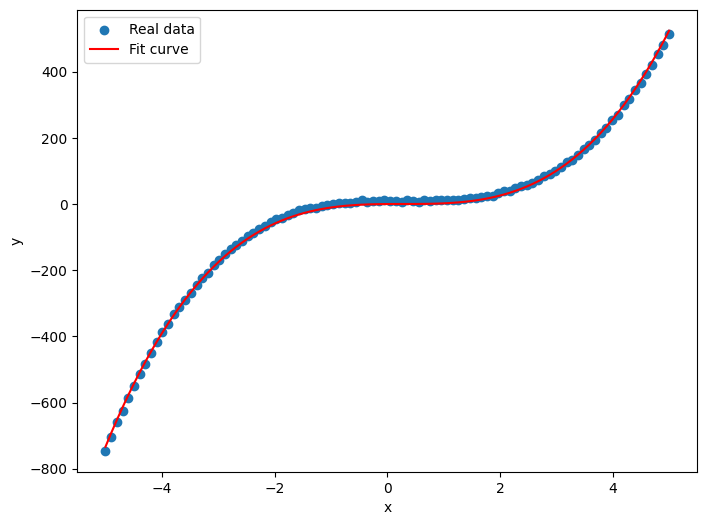

Fitted parameters：a=4.98, b=-4.20, c=1.31，d=-0.14


In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
torch.manual_seed(16) #for fixed random data
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

# Generate random data for a cubic function
def generate_cubic_data(num_samples):
    x = torch.linspace(-5, 5, num_samples)
    y =  5 * x**3 - 5 * x**2 + x + 10  + torch.randn(num_samples) * 2
    return x, y

# Define a quadratic function model
def quadratic_model(x, params):
    a, b, c, d = params  # 修改為 4 參數
    return  a * x**3 + b * x**2 + c * x + d

# Define the loss function (mean squared error)
def mean_squared_error(y_true, y_pred):
    return torch.mean((y_true - y_pred)**2)

def gradient_descent(x, y, learning_rate, num_epochs):
    # Initialize model parameters randomly
    params = torch.randn(4, requires_grad=True)  # 修改為 4 參數

    for epoch in range(num_epochs):
        # Calculate the model predictions
        y_pred = quadratic_model(x, params)

        # Calculate the loss function
        loss = mean_squared_error(y, y_pred)

        # Calculate gradients and update parameters
        loss.backward()
        params.data -= learning_rate * params.grad.data
        # Clear the gradient
        params.grad.zero_()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return params


# Generate data
num_samples = 100
x, y = generate_cubic_data(num_samples)

learning_rate = 0.00001  # 將 learning rate 調小
num_epochs = 1000
optimal_params = gradient_descent(x, y, learning_rate, num_epochs)

# Plot the fitted curve
x_test = torch.linspace(-5, 5, 100)
y_pred = quadratic_model(x_test, optimal_params)

plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy(), label='Real data')
plt.plot(x_test.numpy(), y_pred.detach().numpy(), 'r-', label='Fit curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Output fitted parameters
print(f"Fitted parameters：a={optimal_params[0]:.2f}, b={optimal_params[1]:.2f}, c={optimal_params[2]:.2f}，d={optimal_params[3]:.2f}")  # 修改成顯示 4 個參數